<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/Day08_Ch11_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 베이즈 통계로 A/B 테스트 분석하기

지난 시간, 우리는 가설검정의 함정들과 인과추론의 다양한 기법들을 배웠습니다. 하지만 'p-value가 0.05보다 크면 효과가 없는 것일까?' 혹은 '그래서, 새로운 버전이 기존 버전보다 나을 확률이 정확히 몇 %일까?'와 같은 질문에 빈도주의 통계는 명확한 답을 주기 어려웠습니다.

오늘은 **베이즈 통계(Bayesian Statistics)**의 관점에서 이 문제에 접근합니다. '불확실성'을 확률로 다루는 베이즈 통계의 매력을 느끼고, 데이터를 통해 우리의 '믿음'을 업데이트해나가는 과정을 직접 코드로 구현하며, 더 풍부하고 직관적인 의사결정을 내리는 방법을 체험합니다.

**🎯 프로젝트 목표:**

1.  **빈도주의 vs 베이즈**: 동일한 A/B 테스트 데이터를 두 가지 다른 관점으로 분석하고, 그 차이를 명확히 이해합니다.
2.  **베이즈 추론의 3요소**: **사전분포(Prior), 가능도(Likelihood), 사후분포(Posterior)**의 개념을 이해하고, 자신의 '사전 믿음'을 코드로 표현하는 법을 배웁니다.
3.  **MCMC와 PyMC**: 베이즈 통계의 핵심 엔진인 **MCMC(마르코프 연쇄 몬테카를로)**의 원리를 이해하고, 파이썬 라이브러리 `PyMC`를 사용해 베이지안 모델을 직접 구축합니다.
4.  **결과 해석과 의사결정**: 사후분포와 **신뢰구간(Credible Interval)**을 통해 'B안이 A안보다 좋을 확률'과 같은 질문에 직접 답하며, p-value 기반의 결정과 어떻게 다른지 알아봅니다.


## 🔬 실습 진행 안내

오늘 실습은 다음 순서로 진행됩니다. 각 단계의 목표를 명확히 인지하고 참여해 주세요.

1.  **개인 학습 (Individual Work):**

    - 먼저 **문제 1부터 4까지 모든 문제를 개인적으로** 풀어봅니다. 코드의 빈칸을 채우고, 각 문제의 핵심 개념과 '생각해 볼 문제'에 대한 자신의 답을 정리합니다.
    - 문제들이 서로 연결되어 있으므로(예: 문제 3의 결과는 문제 4에서 사용), 순서대로 모든 문제를 풀어야 합니다.

2.  **팀별 심화 및 발표 준비 (Team Deep-dive & Preparation):**

    - 각 팀은 **지정된 문제 하나**를 맡아 해당 문제의 '전문가'가 됩니다.
    - 개인적으로 풀었던 내용을 바탕으로, 팀원들과 함께 맡은 문제의 핵심 개념, 소스 코드, 생각해 볼 문제에 대한 답을 더 깊이 있게 토론하고 정리합니다.
    - 각 문제의 마지막에 있는 **'[발표 과제]'** 가이드를 참고하여 발표를 준비합니다.

3.  **팀별 발표 (Team Presentation):**
    - 각 팀은 맡은 문제에 대해 다른 모든 학생들을 가르쳐준다는 생각으로 발표를 진행합니다.
    - 문제의 배경, 핵심 개념, 코드 실행 과정, 결과 해석, 그리고 '생각해 볼 문제'에 대한 팀의 결론을 명확하게 전달해야 합니다.


## 📖 시작하기 전: 핵심 용어 사전

오늘 실습에서 계속 마주칠 베이즈 통계의 핵심 용어들입니다. '이런 게 있구나' 정도로 가볍게 읽고 넘어가세요. 실습을 진행하며 각 용어의 의미가 더 명확해질 것입니다.

- **모수(Parameter):** 우리가 알고 싶어 하는 값 (예: 웹사이트의 실제 전환율)
- **사전분포(Prior):** 데이터를 보기 전, 모수에 대해 우리가 가지고 있는 '사전 믿음'을 표현한 확률분포.
- **가능도(Likelihood):** 우리가 정한 모수(전환율)가 주어졌을 때, 현재 가진 데이터(구매자 수)가 관찰될 확률.
- **사후분포(Posterior):** 사전 믿음(Prior)과 데이터(Likelihood)를 결합하여 업데이트된, 모수에 대한 최종적인 믿음의 분포.
- **베이즈 정리:** **사후분포 ∝ 사전분포 × 가능도**. 베이즈 통계의 핵심 원리입니다.
- **MCMC (마르코프 연쇄 몬테카를로):** 복잡한 사후분포를 직접 계산하는 대신, 사후분포를 따르는 수많은 샘플(난수)을 뽑아내어 분포의 모양을 근사하는 시뮬레이션 방법. PyMC가 내부적으로 이 작업을 수행해 줍니다.
- **신뢰구간(Credible Interval):** 베이지안 신뢰구간. "모수가 이 구간 안에 있을 확률이 95%다" 와 같이 직관적으로 해석할 수 있습니다.


## 사전 준비: 라이브러리 및 데이터 로드

오늘은 베이지안 모델링을 위한 `pymc`와 시각화를 위한 `arviz` 라이브러리를 사용합니다.


In [1]:
# # 필요 라이브러리 설치
# !pip install statsmodels scikit-learn pymc arviz

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,241 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# 베이지안 모델링 라이브러리
import pymc as pm
import arviz as az

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
try:
    plt.rc('font', family='NanumGothic')
except:
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

---

## 🚀 프로젝트 시나리오: "새로운 웹사이트 디자인, 효과가 있을까?"

우리 팀은 웹사이트의 구매 전환율을 높이기 위해 새로운 디자인(B안)을 만들었습니다. 기존 디자인(A안)과 새로운 디자인(B안) 중 어떤 것이 더 나은지 확인하기 위해 A/B 테스트를 실시했습니다.

- **A안 (기존 디자인)**: 1,000명에게 노출, 80명이 구매 (전환율 8%)
- **B안 (새로운 디자인)**: 1,000명에게 노출, 100명이 구매 (전환율 10%)

과연 우리는 B안이 더 낫다고 자신 있게 말하고, 모든 사용자에게 새 디자인을 적용할 수 있을까요? 이 질문에 빈도주의와 베이즈주의의 두 가지 렌즈로 답해봅시다.


## 문제 1 (난이도: 하): 빈도주의 관점으로 분석하기 (복습)

> **🎯 목표:** A/B 테스트 결과를 전통적인 가설검정(비율 검정)으로 분석하고, p-value에 기반한 의사결정의 한계를 생각해봅니다.


### 💡 핵심 개념:

빈도주의 가설검정에서는 **귀무가설(H₀: 두 디자인의 전환율은 같다)**과 **대립가설(H₁: 두 디자인의 전환율은 다르다)**을 세웁니다. **p-value**는 '귀무가설이 사실일 때, 현재와 같은 결과 혹은 더 극단적인 결과가 관찰될 확률'을 의미합니다. p-value가 유의수준(보통 0.05)보다 작으면 귀무가설을 기각하고 '통계적으로 유의미한 차이가 있다'고 결론 내립니다.


### 📌 수행 과제:

1.  A안과 B안의 데이터를 변수로 저장합니다.
2.  `statsmodels.stats.proportion.proportions_ztest` 함수를 사용하여 두 집단의 구매 전환율에 차이가 있는지 검정합니다.
3.  검정 결과로 나온 p-value를 확인하고, 유의수준 5% 하에서 어떤 결론을 내릴 수 있는지 해석합니다.


In [2]:
# 1. 데이터 정의
conversions = np.array([80, 100]) # A안, B안의 구매자 수
nobs = np.array([1000, 1000])     # A안, B안의 총 노출 수

# 2. 비율 검정 수행
# TODO: proportions_ztest 함수의 count와 nobs 인자에 알맞은 변수를 넣어 z-통계량과 p-value를 계산하세요.
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(
    count=conversions,
    nobs=nobs,
    alternative='smaller'
)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. 결과 해석 (아래 주석에 직접 작성해 보세요)
# p-value가 0.05보다 큰가요, 작은가요?:
# 귀무가설을 기각할 수 있나요?:
# 빈도주의 관점에서 내릴 수 있는 결론은 무엇인가요?:

# 크다
# 없다
# 통계적으로 유의미하다고 말할 수 없다

Z-statistic: -1.5627
P-value: 0.0591


### 🤔 생각해 볼 문제:

1.  이 결과만 보고 "두 디자인 간에 차이가 없다"고 단정할 수 있을까요? 왜 그렇게 생각하나요?
2.  만약 여러분이 의사결정자라면, 이 결과를 바탕으로 어떤 액션을 취하겠습니까? (예: A안 유지, B안 도입, 테스트 연장 등) 각 선택지의 장단점을 생각해 보세요.
3.  이 상황에서 빈도주의적 접근 방식이 주는 정보의 '아쉬운 점'은 무엇이라고 생각하나요?

---

### 📢 **[발표 과제]**

문제 1을 맡은 팀은 **빈도주의 가설검정**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 귀무가설/대립가설, p-value, 유의수준의 의미를 청중이 이해하기 쉽게 설명합니다.
2.  **코드 리뷰:** `proportions_ztest` 함수를 어떻게 사용했고, 결과로 나온 `z-statistic`과 `p-value`가 각각 무엇을 의미하는지 설명합니다.
3.  **결론 도출:** p-value(0.0565)를 바탕으로 '유의수준 5%' 하에서 어떤 결론을 내릴 수 있는지 명확하게 정리합니다.
4.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 공유하고, p-value 기반 의사결정의 한계점에 대해 토의를 이끌어 보세요.


1. 단정할 수 없다. p-value 0.118은 '차이가 없다'를 증명하는 값이 아니라, 현재 표본(각 1000명)에서 관측된 8% vs 10% 차이가 귀무가설(차이 없음) 하에서도 나올 수 있다는 뜻이기 때문이다. 즉, 이번 결과는 증거가 부족해서 기각을 못한 것이지 효과가 0이라고 결론난 것은 아니다.

2. '테스트 연장/추가 데이터 확보'. 불확실성을 줄여서 바꿀지 말지에 대해 판단 근거를 강화한다. 보조지표들도 확인.

3. B가 A보다 나을 확률같은 의사결정형 질문에 직접 답을 못한다. 결론이 기각/비기각으로 너무 이분법적이고 경직돼서, 비용(개발, 배포, 리스크 등) vs 기대효과같은 현실 판단과 바로 연결이 어렵다.

1. 귀무가설은 두 디자인의 전환율에 차이가 없다는 가설이고 대립가설은 두 디자인의 전환율에 차이가 있다는 가설이다. p-value는 귀무가설이 참이라고 가정했을 때 지금과 같은 결과 또는 그보다 더 극단적인 결과가 나올 확률을 의미한다. 유의수준은 '이 정도보다 희귀하면 우연이라고 보지 않겠다'는 기각 기준선이다.

2. porportions_ztest는 두 집단의 비율 차이가 우연히 발생했을 가능성을 정규근사(z-통계량)을 통해 검정하는 방법이다. count에는 각 집단의 성공 횟수(구매자 수), nobs에는 각 집단의 전체 시도 횟수(노출 수)를 넣었다. 결과로 나온 z-statistic은 두 비율 차이가 귀무가설 하에서 얼마나 표준편차만큼 떨어져 있는지를 나타내고, p-value는 그 차이가 우연히 발생할 확률을 의미한다.

3. 귀무가설을 기각할 수 없다. 이는 두 디자인 간에 전환율 차이가 없다는 뜻이 아니라, 현재 데이터만으로는 통계적으로 유의미한 차이가 있다고 말하기에 증거가 충분하지 않다는 것을 뜻한다.

---


## 문제 2 (난이도: 중): 베이지안의 첫걸음, 사전분포 설정하기

> **🎯 목표:** 베이즈 통계의 핵심 철학인 '사전 믿음(Prior Belief)'을 이해하고, 다양한 의견을 바탕으로 **사전분포(Prior Distribution)**를 직접 설계하고 시각화합니다.


### 💡 핵심 개념:

베이즈 통계에서는 모수(여기서는 '전환율')를 고정된 값이 아닌, 불확실성을 가진 **확률변수**로 봅니다. **사전분포**는 데이터를 보기 전에 우리가 모수에 대해 가지고 있는 믿음을 확률분포로 표현한 것입니다. 전환율과 같이 0과 1 사이의 값을 갖는 비율 데이터에는 보통 **베타 분포(Beta Distribution)**를 사전분포로 사용합니다. 베타 분포는 α, β 두 개의 파라미터로 모양을 조절할 수 있습니다.

**가장 직관적인 해석은 α를 '가상의 성공 횟수', β를 '가상의 실패 횟수'로 생각하는 것입니다.**

- `Beta(1, 1)`: 성공 1번, 실패 1번을 가상으로 본 것과 같습니다. 아는 정보가 거의 없어 모든 가능성을 평평하게 열어두는 **무정보적 사전분포(Uninformative Prior)**입니다.
- `Beta(10, 90)`: 성공 10번, 실패 90번을 가상으로 본 것과 같습니다. 약 100번의 가상 시도에서 10%의 성공률을 기대한다는 꽤 강한 믿음을 가집니다. **(α+β가 클수록 믿음의 강도가 강해집니다)**


### 📌 수행 과제:

1.  **사전 믿음 설정:** 데이터를 보기 전이라고 상상하고, '새로운 웹사이트 디자인 B안의 예상 전환율'에 대한 자신의 믿음을 표현해 보세요. 이를 바탕으로 아래 세 가지 시나리오에 대한 사전분포를 베타 분포로 설계합니다.
    - **낙관적 사전분포(Optimistic Prior):** "새 디자인은 분명 효과가 좋을 거야! 12% 정도는 나올 것 같아."
    - **중립적 사전분포(Neutral Prior):** "전혀 모르겠어. 그냥 모든 가능성을 열어두자."
    - **자신의 사전분포(Your Own Prior):** 자신의 의견을 반영하여 자유롭게 α, β 값을 정해보세요. (예: "기존보다는 조금 낫지 않을까? 9% 정도로 예상해.")
2.  세 가지 사전분포를 `scipy.stats.beta`를 이용해 시각화하고, 각 분포가 어떤 믿음을 나타내는지 비교 설명합니다.


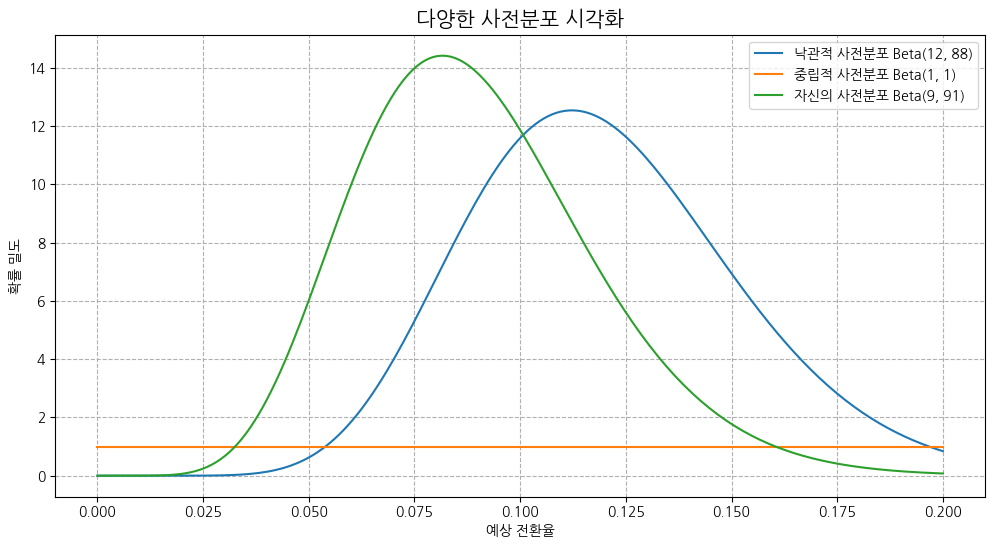

In [3]:
# 1. 사전분포 파라미터 설정
# Beta(α, β)의 평균은 α / (α + β) 입니다.

# 예: '12% 정도를 기대' -> α=12, β=88 정도로 설정 (α+β=100은 믿음의 강도)
optimistic_prior_params = (12, 88)

# TODO: '전혀 모르겠다'는 의미의 무정보적 사전분포 Beta(1, 1)을 설정하세요.
neutral_prior_params = (1, 1)

# TODO: 자신의 의견을 반영한 사전분포 파라미터를 자유롭게 설정하세요. (예: 9% 예상 -> (9, 91))
my_prior_params = (9, 91)

# 2. 사전분포 시각화
x = np.linspace(0, 0.2, 200)
plt.figure(figsize=(12, 6))

plt.plot(x, stats.beta.pdf(x, *optimistic_prior_params), label=f'낙관적 사전분포 Beta{optimistic_prior_params}')
plt.plot(x, stats.beta.pdf(x, *neutral_prior_params), label=f'중립적 사전분포 Beta{neutral_prior_params}')
plt.plot(x, stats.beta.pdf(x, *my_prior_params), label=f'자신의 사전분포 Beta{my_prior_params}')

plt.title('다양한 사전분포 시각화', fontsize=15)
plt.xlabel('예상 전환율')

plt.ylabel('확률 밀도')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

# --- 해석 ---
# 자신이 설정한 사전분포는 어떤 믿음을 나타내나요? 왜 그렇게 설정했나요? (주석에 직접 작성해보세요)


### 🤔 생각해 볼 문제:

1.  **믿음의 강도:** 아래 두 사전분포를 시각화하고 비교해 보세요.
    - **약한 믿음:** `Beta(1, 1)` (아무 정보도 없음)
    - **강한 믿음:** `Beta(8, 92)` (기존 A안의 전환율 8%와 비슷한 수준일 것이라는 강한 믿음. 가상으로 100번 시도해서 8번 성공했다고 보는 것과 유사)
      두 분포의 모양은 어떻게 다른가요? `alpha+beta` 값의 크기가 '믿음의 강도'와 어떤 관련이 있는지 설명해 보세요.
2.  **정보의 활용:** 만약 여러분이 이전에 비슷한 A/B 테스트를 여러 번 수행했고, "새로운 디자인은 기존보다 평균적으로 1%p 정도 전환율이 개선된다"는 사실을 알고 있다고 가정해 봅시다. 이 정보를 활용하여 B안의 사전분포를 설정한다면 `Beta(1, 1)`과 같은 중립적 사전분포와 어떻게 달라질까요? 어떤 사전분포가 더 합리적일지, 그 이유는 무엇인지 생각해 보세요.
3.  **객관성의 함정:** 무정보적 사전분포(Uninformative Prior)를 사용하는 것이 항상 가장 '객관적'이고 좋은 방법일까요? 사전 정보가 있음에도 이를 사용하지 않을 경우 어떤 단점이 있을 수 있을지 이야기해 보세요.

---

### 📢 **[발표 과제]**

문제 2를 맡은 팀은 **사전분포(Prior Distribution)**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 베이즈 통계에서 '사전 믿음'이란 무엇이며, 왜 중요한지 설명합니다. 특히 '모수를 확률변수로 본다'는 개념과 베타 분포의 `alpha`, `beta`를 '가상 성공/실패'로 해석하는 방법을 강조하세요.
2.  **코드 리뷰:** 베타 분포 `stats.beta.pdf`를 사용해 다양한 사전 믿음(낙관적, 중립적, 자신만의 믿음)을 어떻게 시각화했는지 보여줍니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 '믿음의 강도'(`alpha+beta`)와 '정보의 활용'에 대한 깊이 있는 설명을 통해, 사전분포 설정이 분석 결과에 미치는 영향을 청중에게 전달하세요.


1. 첫 번째는 약한 믿음이다. 그래프가 완전히 평평하다. 특정 전환율을 더 믿지 않으며 모든 값이 동일하게 가능하다. (아무 정보도 없는 상태) 두 번째는 강한 믿음이다. 평균이 8% 근처이고 분포가 좁고 뾰족하며 8%에서 멀어질수록 확률이 급격하게 낮아진다. 전환율이 8%일 거라는 강한 선입견이 시각화된 결과이다.
2. beta(9, 91)과 같은 사전분포를 설정할 수 있다. 과거의 a/b 테스트 경험을 통해 새로운 디자인이 평균적으로 약 1%p의 전환율 개선을 보인다는 정보를 이미 알고 있기 때문에 저 사전분포가 더 합리적이다.
3. 사전 정보가 존재함에도 이를 반영하지 않고 무정보적 사전분포를 사용하는 것은 반드시 가장 객관적인 선택이라고 보기 어렵다. 오히려 과거의 경험이나 도메인 지식을 명시적으로 반영한 뒤, 데이터를 통해 그 믿음을 수정해나가는 과정이 더 합리적인 추론으로 이어질 수 있다.

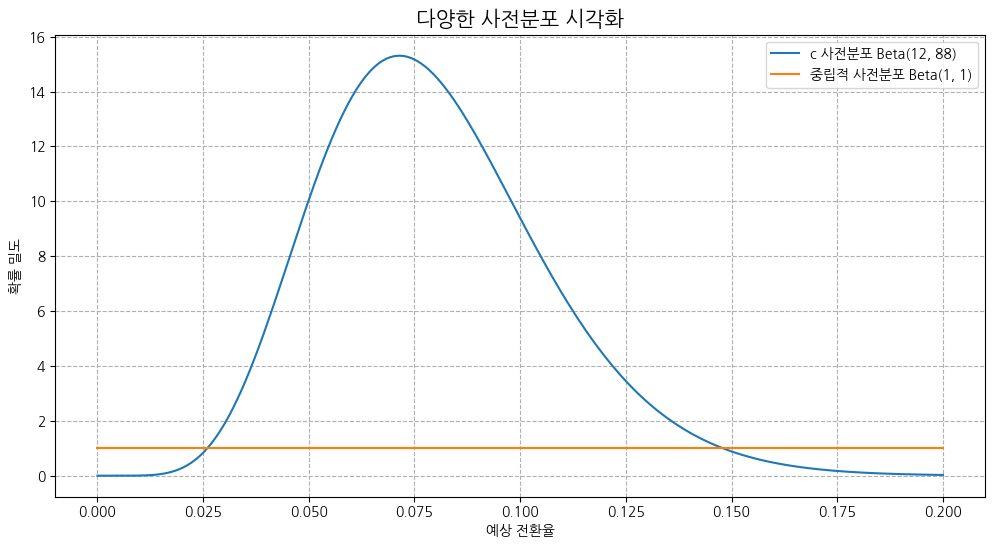

In [4]:
# 1. 사전분포 파라미터 설정
# Beta(α, β)의 평균은 α / (α + β) 입니다.

c_prior_params = (8, 92)

# TODO: '전혀 모르겠다'는 의미의 무정보적 사전분포 Beta(1, 1)을 설정하세요.
neutral_prior_params = (1, 1)

# 2. 사전분포 시각화
x = np.linspace(0, 0.2, 200)
plt.figure(figsize=(12, 6))

plt.plot(x, stats.beta.pdf(x, *c_prior_params), label=f'c 사전분포 Beta{optimistic_prior_params}')
plt.plot(x, stats.beta.pdf(x, *neutral_prior_params), label=f'중립적 사전분포 Beta{neutral_prior_params}')

plt.title('다양한 사전분포 시각화', fontsize=15)
plt.xlabel('예상 전환율')

plt.ylabel('확률 밀도')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

1. 사전 믿음이란 데이터를 보기 전에 우리가 모수(여기서는 전환율)에 대해 가지고 있는 기존의 생각이나 경험을 확률분포로 표현한 것이다. 베이즈 통계에서는 새로운 데이터가 나올 때마다 기존의 믿음을 업데이트해나가는 방식으로 추론한다. 이때 사전 믿음은 업데이트의 출발점이 되기 때문에 중요하다. 같은 데이터를 보더라도 어떤 사전 믿음에서 출발하느냐에 따라 결론이 달라질 수 있기 때문에 사전 믿음을 명시적으로 드러내는 것이 중요하다.

빈도주의에서는 모수를 고정된 값으로 보고 데이터를 통해 그 값을 추정한다. 반면 베이즈 통계에서는 모수 자체를 불확실성을 가진 확률변수로 보고, 데이터를 통해 그 분포를 점점 업데이트해나간다.

beta 분포의 알파와 베타는 우리가 데이터를 보기 전에 이미 성공과 실패를 몇 번 본 것처럼 가정하는 값이다.

2. 다양한 사전 믿음이 시각화된 결과
- 낙관적 사전분포 - 12% 근처에서 뾰족하다. 폭이 상대적으로 좁다. '새 디자인은 꽤 잘 나올 것이고 12% 근처라고 거의 믿는다'라는 의미를 가진다. 평균은 12%이고 가짜 데이터 100개 분량이며 다른 값(6%, 18%)은 별로 믿지 않는다.
- 중립적 사전분포 - '전환율이 얼마일지 전혀 모르겠다', 1%, 5%, 10%, 15% 모두 똑같이 가능하고 평균이 0.5로 계산되긴 하지만 이 평균은 (균등분포라서) 아무 의미가 없다.
- 내가 정한 사전 분포 - '전환율은 9%쯤일 것 같긴 한데 틀릴 수도 있다고 생각함'라는 의미. 평균은 약 9%이며 가짜 데이터 약 100개 분량의 믿음임.



---

베이즈 통계에서 사전분포의 alpha와 beta의 합은
사전 믿음의 강도를 나타내며,
이는 데이터를 보기 전에 이미 관측했다고 가정하는
가상 실험의 수로 해석할 수 있다.

alpha+beta가 클수록 사전분포는 더 강한 믿음을 반영하고,
새로운 데이터가 사후분포에 미치는 영향은 상대적으로 작아진다.

또한 과거의 실험 결과나 도메인 지식과 같은 사전 정보가 존재한다면,
이를 사전분포에 반영함으로써
무정보적 prior를 사용할 때보다
더 효율적이고 현실적인 추론이 가능하다.

라---


## 문제 3 (난이도: 상): PyMC로 베이지안 A/B 테스트 모델링하기

> **🎯 목표:** `PyMC`를 사용하여 베이지안 추론의 전 과정을 구현합니다. 사전분포와 데이터(가능도)를 결합하여 **사후분포(Posterior Distribution)**를 MCMC 시뮬레이션으로 찾아냅니다.


### 💡 핵심 개념:

베이즈 정리는 `사후분포 ∝ 가능도 × 사전분포` 입니다. `PyMC`는 이 과정을 자동화해줍니다.

1.  **모델 정의 (`with pm.Model():`)**: 모델의 구조를 정의하는 공간입니다.
2.  **사전분포 정의 (`pm.Beta`)**: 각 그룹(A, B)의 전환율 모수 `p_A`, `p_B`가 어떤 사전분포를 따를지 지정합니다. (문제 2에서 설계한 '중립적 사전분포'를 사용합시다.)
3.  **가능도 정의 (`pm.Binomial`)**: 실제 관측된 데이터(구매자 수)가 어떤 확률분포(이항분포)로부터 생성되었는지를 정의합니다. 이는 데이터와 모수를 연결하는 다리 역할을 합니다.
4.  **MCMC 실행 (`pm.sample()`)**: 정의된 모델로부터 사후분포를 따르는 수많은 샘플(난수)을 추출합니다. 이 샘플들의 분포가 바로 우리가 원하는 사후분포의 근사치가 됩니다.


In [5]:
# PyMC 모델 정의
with pm.Model() as ab_test_model:
    # 1. 사전분포 정의: 전환율 p_A와 p_B에 대한 '사전 믿음'을 설정합니다.
    #    아무 정보가 없다고 가정하고, 모든 가능성을 동등하게 보는 Beta(1, 1) 분포를 사용합니다.

    # TODO-1: A안의 전환율(p_A)에 대한 사전분포를 'p_A'라는 이름으로, alpha=1, beta=1로 설정하세요.
    p_A = pm.Beta('p_A', alpha=1, beta=1)
    # TODO-2: B안의 전환율(p_B)에 대해서도 동일하게 설정하세요.
    p_B = pm.Beta('p_B', alpha=1, beta=1)

    # 2. 두 전환율의 차이 계산: 우리가 정말 궁금한 'B가 A보다 얼마나 더 나은가'를 나타내는 변수를 만듭니다.
    # TODO-3: pm.Deterministic을 사용해, 첫 번째 인자로는 변수 이름 'delta'를, 두 번째 인자로는 p_B와 p_A의 차이를 넣어 정의하세요.
    delta = pm.Deterministic('delta', p_B - p_A)

    # 3. 가능도 정의: 모델을 실제 데이터와 연결합니다. 'n번 시도 중 k번 성공' 데이터는 이항분포(Binomial)로 설명할 수 있습니다.

    # TODO-4: A안의 관측 데이터가 이항분포를 따른다고 설정합니다.
    # (n: 총 방문자 수, p: 성공 확률(사전분포에서 정의한 변수), observed: 실제 구매자 수)
    obs_A = pm.Binomial('obs_A', n=1000, p=p_A, observed=80)

    # TODO-5: B안에 대해서도 동일하게, 알맞은 변수들(nobs, p_B, conversions)을 인자에 연결하여 설정하세요.
    obs_B = pm.Binomial('obs_B', n=1000, p=p_B, observed=100)

    # 4. MCMC 시뮬레이션 실행: 위에서 설계한 모델로부터 사후분포의 샘플들을 추출합니다.
    #    이 부분은 복잡한 계산을 PyMC가 대신 해주는 과정입니다.
    trace = pm.sample(4000, tune=1000, cores=1, return_inferencedata=True)

print("MCMC 시뮬레이션 완료!")

Output()

MCMC 시뮬레이션 완료!


B안과 A안의 전환율 차이(delta)를 하나의 확률변수로 직접 만들어주는 역할을 한다.

p_A, p_B는 각각 전화율의 사후분포이고 delta는 그 둘의 차이인 사후분포이다.

즉 차이가 0보다 큰가?, 얼마나 클 수 있는가?, 마이너스일 가능성은? 같은 것들을 확률분포로 바로 얻는다.

그 차이가 얼마나 될 가능성이 있는지까지 분포로 알 수 있다는 점이 베이즈의 강점이다.

빈도주의가 주는 것은 p-value 하나인데 이것은 차이의 분포는 안 준다.

pm.Deterministic('delta', p_B - p_A)는 두 전환율의 차이를 하나의 확률변수로 정의하여 그 사후분포를 직접 얻기 위한 코드이다. 이를 통해 B안이 A안보다 나을 확률뿐만 아니라 전환율 차이가 어느 범위에 있을지까지 확률적으로 해석할 수 있다. 이는 단일한 p-value만 제공하는 빈도주의 분석에서는 얻기 어려운 정보이며, 베이즈를 통해 의사결정이 이루어질 때 더 유용할 수 있는 베이즈의 강점이다.

### 🤔 생각해 볼 문제:

위 코드에서 `pm.Deterministic('delta', p_B - p_A)` 라인은 어떤 역할을 할까요? 빈도주의 분석에서는 얻을 수 없었던, 이 '차이의 분포'를 직접 구하는 것이 왜 베이즈 분석의 강력한 장점이 되는지 설명해 보세요.

---

### 📢 **[발표 과제]**

문제 3을 맡은 팀은 **PyMC 모델링**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 베이즈 정리(`사후분포 ∝ 가능도 × 사전분포`)가 PyMC 코드에 어떻게 구현되는지 연결하여 설명합니다. MCMC의 역할을 '사후분포를 찾아가는 시뮬레이션 과정'으로 쉽게 비유하여 설명해 보세요.
2.  **코드 리뷰:** `with pm.Model() as ...:` 구문부터 `pm.sample()`까지 코드 한 줄 한 줄의 의미를 상세히 설명합니다.
    - `pm.Beta`: 왜 사전분포로 사용되었는가? (문제 2와 연결)
    - `pm.Binomial`: 왜 가능도로 사용되었는가? `n`, `p`, `observed` 인자에 각각 어떤 변수를 연결해야 하는지 설명합니다.
    - `pm.Deterministic`: 이 코드가 왜 베이즈 분석의 핵심 장점과 연결되는가? ('생각해 볼 문제'와 연결)
3.  **'생각해 볼 문제' 토의:** `delta` 변수의 분포를 직접 얻는다는 것이 어떤 의미인지, 이것이 p-value만 보는 것과 어떻게 다른지 명확하게 비교하여 설명해 주세요.


1. Posterior ∝ Likelihood × Prior
(데이터를 보기 전 믿음 + 관측된 데이터 → 업데이트된 믿음)

p_A = pm.Beta("p_A", 1, 1)

p_B = pm.Beta("p_B", 1, 1)

이 부분은 Prior(사전분포)에 해당한다. 전환율은 0~1 사이 값이고 데이터를 보기 전엔 모른다는 것을 분포로 표현한 것이다.

obs_A = pm.Binomial("obs_A", n=1000, p=p_A, observed=80)

obs_B = pm.Binomial("obs_B", n=1000, p=p_B, observed=100)

이 부분은 Likelihood(가능도)이다. 'p가 주어졌을 때 이런 구매자 수가 나올 확률'로 데이터와 모수를 연결한다.

trace = pm.sample(...)

이 부분은 Posterior(사후분포) 부분이다.

위 Prior와 Likelihood를 결합한 결과(사후분포)를 샘플로 얻는다.

---

MCMC는 가능한 전환율 후보들을 계속 뽑아보면서 데이터에 잘 맞는 후보가 자주 나오게 만드는 시뮬레이션이다. 그 '많이 뽑힌 값들의 모양'이 바로 사후분포이다.


---


with pm.Model() as ab_test_model:

이 코드는 '이 안에 있는 식들이 하나의 확률모형이다'라고 선언하는 공간이다.

p_A = pm.Beta("p_A", 1, 1)

p_B = pm.Beta("p_B", 1, 1)

전환율 p는 0~1 사이이고,

beta 분포도 0~1 범위를 다루기 때문에 전환율의 사전분포로 가장 표준적으로 사용한다.

beta(1, 1)은 무지(중립) prior이다.

---

delta = pm.Deterministic("delta", p_B - p_A)

우리가 진짜 알고싶은 건 차이가 있냐 없냐가 아니라 B가 A보다 얼마나 더 좋은가의 차이이다. 베이즈는 이 차이(delta)의 분포 자체를 바로 얻을 수 있다.

obs_A = pm.Binomial("obs_A", n=1000, p=p_A, observed=80)

n은 전체 노출 수(시도 횟수)이다. (1000)

p는 성공 확률(전환율 모수)이다. (p_A)

observed는 실제 관측된 성공 횟수(구매자 수)이다. (80)

---

trace = pm.sample(4000, tune=1000, ...)

sample: posterior를 계산'이 아니라 '샘플링'으로 얻는다

사후분포에서 샘플을 수천 개 뽑아서 분포를 근사한다.

---


## 문제 4 (난이도: 중): 사후분포 해석 및 최종 의사결정

> **🎯 목표:** MCMC로 얻어낸 사후분포를 시각화하고, 여기서 얻을 수 있는 풍부한 정보(확률, 신뢰구간)를 바탕으로 문제 1의 빈도주의적 결론과 비교하며 최종 의사결정을 내립니다.


### 💡 핵심 개념:

- **사후분포(Posterior Distribution)**: 사전 믿음이 데이터를 통해 업데이트된 결과. 모수에 대한 우리의 최종적인 지식을 나타냅니다.
- **95% 신뢰구간(Credible Interval)**: 사후분포에서, 모수가 존재할 확률이 95%인 구간.
  - **직관적인 해석 (O):** "B안과 A안의 전환율 차이(`delta`)가 -0.1%p ~ 4.1%p 사이에 있을 확률이 95%다." 라고 말할 수 있습니다.
  - **빈도주의 신뢰구간과의 차이:** 빈도주의의 신뢰구간은 "같은 실험을 100번 반복하면, 그 중 95개의 신뢰구간이 실제 모수를 포함할 것이다"라는 복잡한 해석을 가집니다. 베이지안의 신뢰구간이 훨씬 직접적이고 이해하기 쉽습니다.
- **확률 계산**: 사후분포 샘플을 직접 사용하여 'B안이 A안보다 좋을 확률', 즉 `P(p_B > p_A)` 또는 `P(delta > 0)`을 계산할 수 있습니다.


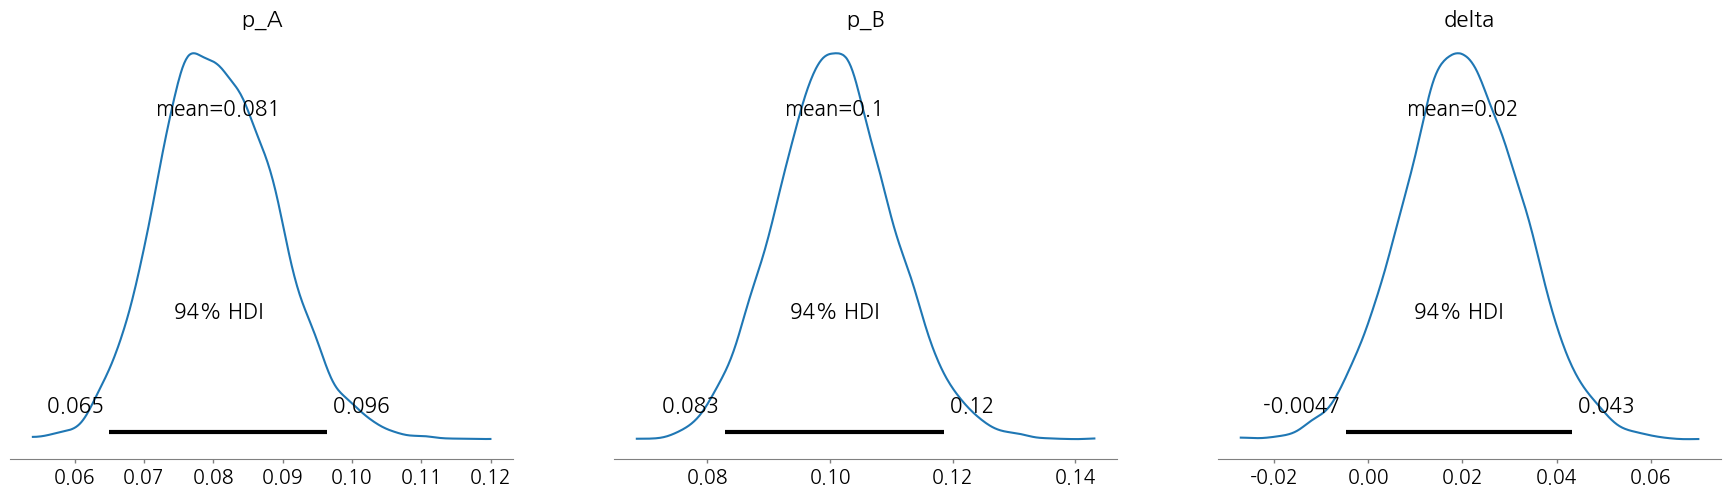

B안이 A안보다 좋을 확률: 94.21%

전환율 차이(delta)에 대한 요약 통계:
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
delta  0.02  0.013  -0.005    0.043        0.0      0.0    8546.0    5847.0   

       r_hat  
delta    1.0  


In [6]:
# 1. 사후분포 시각화
# TODO-1: MCMC 실행 결과인 trace 객체와, 보고 싶은 변수들('p_A', 'p_B', 'delta')의 이름을
#         arviz의 plot_posterior 함수에 인자로 전달하여 사후분포를 시각화하세요.
az.plot_posterior(trace, var_names=["p_A", "p_B", "delta"])

plt.show()

# 2. B안이 A안보다 좋을 확률 계산
# trace 객체에서 'delta' 샘플들을 추출합니다.
# posterior_delta = az.extract(trace, var_names=["delta"])['delta']

posterior_delta = trace.posterior["delta"].values.flatten()

# posterior_delta = trace.posterior.delta

# TODO-2: B안이 A안보다 좋다는 것은 delta(p_B - p_A)가 0보다 크다는 것을 의미합니다.
#         이를 코드로 표현하여 'B가 A보다 좋을 확률'을 계산하세요.
prob_b_better_than_a = (posterior_delta > 0).mean()

# prob_b_better_than_a = (posterior_delta > 0).mean().item()

print(f"B안이 A안보다 좋을 확률: {prob_b_better_than_a * 100:.2f}%\n")

# 3. 전환율 차이(delta)의 95% 신뢰구간 확인
# TODO-3: az.summary() 함수에 trace 객체와 보고 싶은 변수 'delta'를 전달하여 요약 통계를 확인하세요.
summary = az.summary(trace, var_names=["delta"])
print("전환율 차이(delta)에 대한 요약 통계:")
print(summary)

# 4. 최종 결과 해석 (아래 주석에 직접 작성해 보세요)
# B안이 A안보다 좋을 확률은 몇 %로 계산되었나요?:
# 전환율 차이(delta)의 95% 신뢰구간은 어떻게 되나요? 이 구간이 0을 포함하나요?:
# 이 구간의 의미는 무엇인가요?:

In [7]:
type(trace)

arviz.data.inference_data.InferenceData

In [8]:
list(trace.posterior.data_vars)


['delta', 'p_A', 'p_B']

1. 빈도주의 분석은 p-value가 유의수준보다 작은지 큰지를 보고 통계적으로 유의미하다고 말할 수 있는지 없는지를 알려준다. B안이 더 나을 확률이 얼마인지 알려주지는 않는다. 개선 효과가 얼마나 클지/작을지도. 의사결정자에게는 행동 지침이 다소 부족하게 느껴질 수 있다. 하지만 베이즈 분석은 B안이 A안보다 좋을 확률이 약 94%이며, 전환율 차이(delta)의 평균은 2.0%p, 전환율 차이(delta)의 신뢰구간은 약 -0.3%p ~ +4.5%p라는 것을 알려준다.
2. 점진적 롤아웃 + 추가 데이터 확보로 할 것이다. B안이 더 좋을 확률이 매우 높고 평균 개선 폭도 2%p지만 신뢰구간이 0을 살짝 포함하며 소폭 악화 가능성도 완전히 배제되지는 않기 때문이다.
3. B안 도입 비용이 크다면 결정은 더 보수적으로 바뀔 것이다.

### 🤔 생각해 볼 문제:

**상황 종합:**

- **빈도주의 분석(문제 1):** p-value가 0.0565로, '통계적으로 유의미한 차이가 있다'고 결론 내리지 못했습니다.
- **베이즈 분석(문제 4):** 'B안이 A안보다 좋을 확률'이 약 97%로 계산되었고, 전환율 차이의 95% 신뢰구간은 0을 살짝 걸치거나 살짝 벗어나는 양수 구간으로 나타납니다.

**생각할 주제:**

1.  두 분석 결과가 주는 메시지는 어떻게 다른가요? 베이즈 분석은 빈도주의 분석이 주지 못했던 어떤 추가 정보를 제공했나요?
2.  이제 여러분은 이 모든 정보를 가진 의사결정자입니다. 최종적으로 어떤 결정을 내리겠습니까? (A안 유지, B안 도입, 추가 테스트 진행 등) 여러분의 결정을 베이즈 분석 결과에 근거하여 설명해 보세요.
3.  (심화) 만약 B안을 도입하는 데 큰 비용이 든다면, 여러분의 결정이 달라질까요? 베이즈 분석 결과(예: 전환율 개선 효과의 크기, 불확실성)를 어떻게 활용하여 비용-편익 분석을 할 수 있을지 아이디어를 내보세요.

---

### 📢 **[발표 과제]**

문제 4를 맡은 팀은 **베이지안 결과 해석 및 의사결정**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 사후분포(Posterior)와 신뢰구간(Credible Interval)의 의미를 직관적으로 설명합니다. 특히 빈도주의의 신뢰구간(Confidence Interval)과 어떻게 해석이 다른지 강조하세요.
2.  **코드 리뷰 및 결과 해석:** `az.plot_posterior`, `az.summary` 함수로 얻은 시각화와 요약 통계표를 해석하는 방법을 설명합니다. 'B안이 A안보다 좋을 확률'을 계산하는 코드의 의미를 설명하고, 그 결과(약 97%)가 의사결정자에게 어떤 정보를 주는지 전달합니다.
3.  **종합 결론 및 토의:** '최종 정리 및 의사결정'의 3가지 질문에 대한 팀의 결론을 발표합니다. 빈도주의 분석(문제 1) 결과와 베이즈 분석 결과를 종합하여, "그래서 우리는 어떤 액션을 취해야 하는가?"에 대한 명확한 주장과 근거를 제시하며 전체 토의를 이끌어 보세요.


1. posterior은 '데이터를 보고 업데이트된 최종 믿음의 분포'이다. credible interval은 '모수가 이 구간에 있을 확률이 95% 혹은 94%'이다. 빈도주의 CI와 다른 것은, 베이즈는 '이 구간에 있을 확률'이라는 직접 해석이라는 점이다.

2. az.plot_posterior는 MCMC로 얻은 사후분포(posterior)를 시각화한다. (p_A, p_B, delta 분포) 시각적으로도 B안이 A안보다 전환율이 높을 가능성이 크다는 것을 확인할 수 있다. az_summary는 delta의 요약 통계량을 출력한다. 평균, 표준편차, 그리고 credible interval(hdi)를 확인한다. 전환율 차이의 평균은 약 2.0%p이고 94% 신뢰구간(hdi)은 약 -0.3%p ~ + 4.5%p이다. 전환율 차이는 대부분 양수로 나타나지만, 아주 작은 확률로 B안이 더 나쁠 가능성도 남아 있다.

3. ((trace.posterior['delta'].values.flatten() > 0).mean()
  - B안이 A안보다 좋을 확률
  - 사후분포에서 가능한 모든 delta 값(시나리오)을 뽑는다
  - 그 중에서 delta > 0 -> B가 A보다 좋은 경우 그 비율을 계산한다 (확률)
  - 현재 데이터와 사전분포를 모두 고려했을 때, 가능한 세계의 약 94%에서 B안의 전환율이 A안보다 높다는 뜻을 가짐
